## Tugas Praktkium

#### 1. Tugas K-Means

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


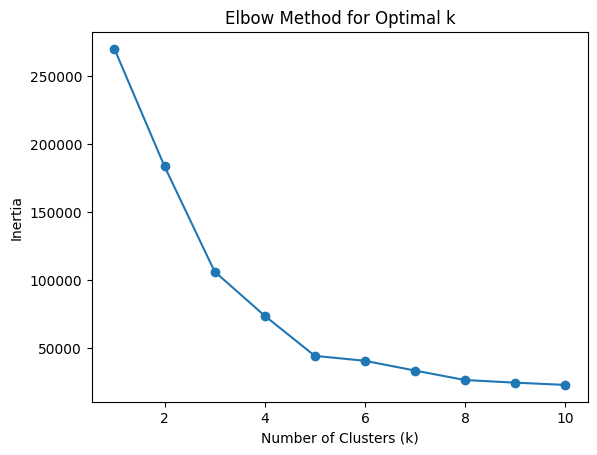

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

inertia = []
k_values = range(1, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


#### 2. Tugas DBSCAN

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

5. Lakukan eksperimen:
    - eps = 0.05, 0.1, 0.3, 0.5
    - min_samples = 3, 10, 20
    - Catat perubahan klaster, noise, dan kualitas evaluasi.

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import (homogeneity_score, completeness_score, v_measure_score,
                             adjusted_rand_score, adjusted_mutual_info_score, silhouette_score)
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset
X, _ = make_moons(n_samples=1000, noise=0.05, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. DBSCAN model
db = DBSCAN(eps=0.2, min_samples=5).fit(X_scaled)
labels = db.labels_

# Count clusters and noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise_points = list(labels).count(-1)

# 3. Evaluation metrics
metrics_result = {
    "Homogeneity": homogeneity_score(_, labels),
    "Completeness": completeness_score(_, labels),
    "V-measure": v_measure_score(_, labels),
    "ARI": adjusted_rand_score(_, labels),
    "AMI": adjusted_mutual_info_score(_, labels),
    "Silhouette": silhouette_score(X_scaled, labels) if n_clusters > 1 else None
}

metrics_result


{'Homogeneity': np.float64(1.0),
 'Completeness': np.float64(1.0),
 'V-measure': np.float64(1.0),
 'ARI': 1.0,
 'AMI': np.float64(1.0),
 'Silhouette': np.float64(0.3911598537138403)}

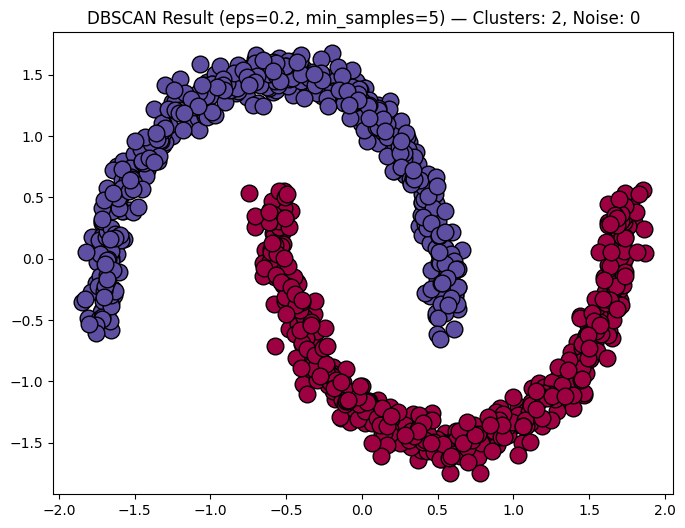

In [6]:
# Visualisasi
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Noise = hitam

    class_member_mask = labels == k

    # Core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=12
    )

    # Border points
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=5
    )

plt.title(f"DBSCAN Result (eps=0.2, min_samples=5) — Clusters: {n_clusters}, Noise: {noise_points}")
plt.show()
